# Task 1: Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [2]:
data = pd.read_csv("C:/Users/vithu/Downloads/Dataset .csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data['Switch to order menu'].value_counts()

Switch to order menu
No    9542
Name: count, dtype: int64

In [9]:
data['Is delivering now'].value_counts()

Is delivering now
No     9508
Yes      34
Name: count, dtype: int64

In [10]:
data["Has Table booking"].value_counts()

Has Table booking
No     8384
Yes    1158
Name: count, dtype: int64

In [11]:
data["Has Online delivery"].value_counts()

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

In [12]:
data = pd.get_dummies(data = data, columns = ["Has Table booking","Has Online delivery",'Is delivering now'])

In [13]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,4.8,Dark Green,Excellent,314,False,True,True,False,True,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,False,True,True,False,True,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4.4,Green,Very Good,270,False,True,True,False,True,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4.9,Dark Green,Excellent,365,True,False,True,False,True,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4.8,Dark Green,Excellent,229,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,4.1,Green,Very Good,788,True,False,True,False,True,False
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,4.2,Green,Very Good,1034,True,False,True,False,True,False
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,3.7,Yellow,Good,661,True,False,True,False,True,False
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,4.0,Green,Very Good,901,True,False,True,False,True,False


In [14]:
data['Has Online delivery_Yes'] = data['Has Online delivery_Yes'].astype("uint8")
data['Has Online delivery_No'] = data['Has Online delivery_No'].astype("uint8")
data['Has Table booking_Yes'] = data['Has Table booking_Yes'].astype("uint8")
data['Has Table booking_No'] = data['Has Table booking_No'].astype("uint8")
data['Is delivering now_Yes'] = data['Has Table booking_Yes'].astype("uint8")
data['Is delivering now_No'] = data['Has Table booking_No'].astype("uint8")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant ID            9542 non-null   int64  
 1   Restaurant Name          9542 non-null   object 
 2   Country Code             9542 non-null   int64  
 3   City                     9542 non-null   object 
 4   Address                  9542 non-null   object 
 5   Locality                 9542 non-null   object 
 6   Locality Verbose         9542 non-null   object 
 7   Longitude                9542 non-null   float64
 8   Latitude                 9542 non-null   float64
 9   Cuisines                 9542 non-null   object 
 10  Average Cost for two     9542 non-null   int64  
 11  Currency                 9542 non-null   object 
 12  Switch to order menu     9542 non-null   object 
 13  Price range              9542 non-null   int64  
 14  Aggregate rating         9542

In [16]:
x =  data[["Country Code", "Longitude", "Latitude", "Average Cost for two", "Price range", "Price range", "Votes", "Has Table booking_No", "Has Table booking_Yes","Has Online delivery_No","Has Online delivery_Yes","Is delivering now_No","Is delivering now_Yes"]]
y = data['Aggregate rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
x_test_pred = model.predict(x_test)

In [19]:
l_mse = mean_squared_error(y_test, x_test_pred)
l_mae = mean_absolute_error(y_test, x_test_pred)
l_r2 = r2_score(y_test, x_test_pred)

print("LINEAR REGRESSION")
print("Mean Squared Error of the Test data: ", l_mse)
print("Mean Absolute Error of the Test data: ", l_mae)
print("R-squared of the Test data: ", l_r2)

LINEAR REGRESSION
Mean Squared Error of the Test data:  1.5350650123014367
Mean Absolute Error of the Test data:  1.02448572206829
R-squared of the Test data:  0.3296753593518207


In [20]:
ds = DecisionTreeRegressor()
ds.fit(x_train, y_train)

DecisionTreeRegressor()

In [21]:
x_test_pred_d = ds.predict(x_test)

In [22]:
d_mse = mean_squared_error(y_test, x_test_pred_d)
d_mae = mean_absolute_error(y_test, x_test_pred_d)
d_r2 = r2_score(y_test, x_test_pred_d)

print("DECISION TREE")
print("Mean Squared Error (MSE): ", d_mse)
print("Mean Absolute Error (MAE): ", d_mae)
print("R-squared: ", d_r2)

DECISION TREE
Mean Squared Error (MSE):  0.18048716605552642
Mean Absolute Error (MAE):  0.2730749083289681
R-squared:  0.9211857519008964


In [23]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
x_test_pred_r = rf.predict(x_test)

In [25]:
r_mse = mean_squared_error(y_test, x_test_pred_r)
r_mae = mean_absolute_error(y_test, x_test_pred_r)
r_r2 = r2_score(y_test, x_test_pred_r)

print("RANDOM FOREST")
print("Mean Squared Error (MSE): ", r_mse)
print("Mean Absolute Error (MAE): ", r_mae)
print("R-squared: ", r_r2)

RANDOM FOREST
Mean Squared Error (MSE):  0.09709601691112275
Mean Absolute Error (MAE):  0.2031115068971538
R-squared:  0.9576005888201841


# Task 2: Customer Preference Analysis

In [26]:
data['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [27]:
cuisines_rating = data.groupby("Cuisines")['Aggregate rating'].mean().reindex()
cuisines_rating

Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64

In [28]:
cusine_rating_top = cuisines_rating.head(10)
cusine_rating_top

Cuisines
Afghani                                      0.725000
Afghani, Mughlai, Chinese                    0.000000
Afghani, North Indian                        0.000000
Afghani, North Indian, Pakistani, Arabian    0.000000
African                                      4.700000
African, Portuguese                          4.200000
American                                     3.667742
American, Asian, Burger                      4.600000
American, Asian, European, Seafood           4.600000
American, Asian, Italian, Seafood            4.500000
Name: Aggregate rating, dtype: float64

In [29]:
top_cusine = cusine_rating_top.sort_values(ascending = False)
top_cusine

Cuisines
African                                      4.700000
American, Asian, Burger                      4.600000
American, Asian, European, Seafood           4.600000
American, Asian, Italian, Seafood            4.500000
African, Portuguese                          4.200000
American                                     3.667742
Afghani                                      0.725000
Afghani, Mughlai, Chinese                    0.000000
Afghani, North Indian                        0.000000
Afghani, North Indian, Pakistani, Arabian    0.000000
Name: Aggregate rating, dtype: float64

In [30]:
cusine_vote = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending = False)
cusine_vote.head(7)

Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
Name: Votes, dtype: int64

In [31]:
print(f"Top Cuisines Names: {cusine_vote.index[0]}")

Top Cuisines Names: North Indian, Mughlai


# Task 3: Data visualization

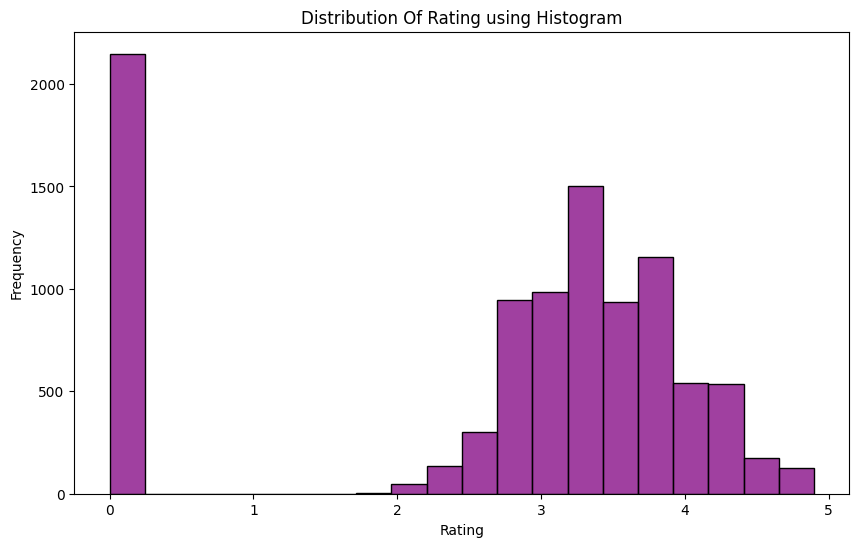

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data['Aggregate rating'], bins=20,color='purple')
plt.title("Distribution Of Rating using Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

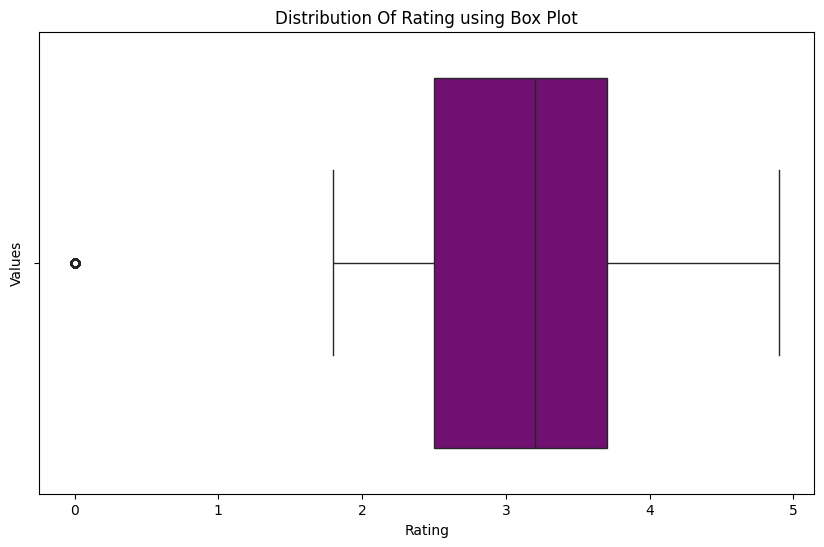

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Aggregate rating', data = data, color='purple')
plt.title("Distribution Of Rating using Box Plot")
plt.xlabel("Rating")
plt.ylabel("Values")
plt.show()

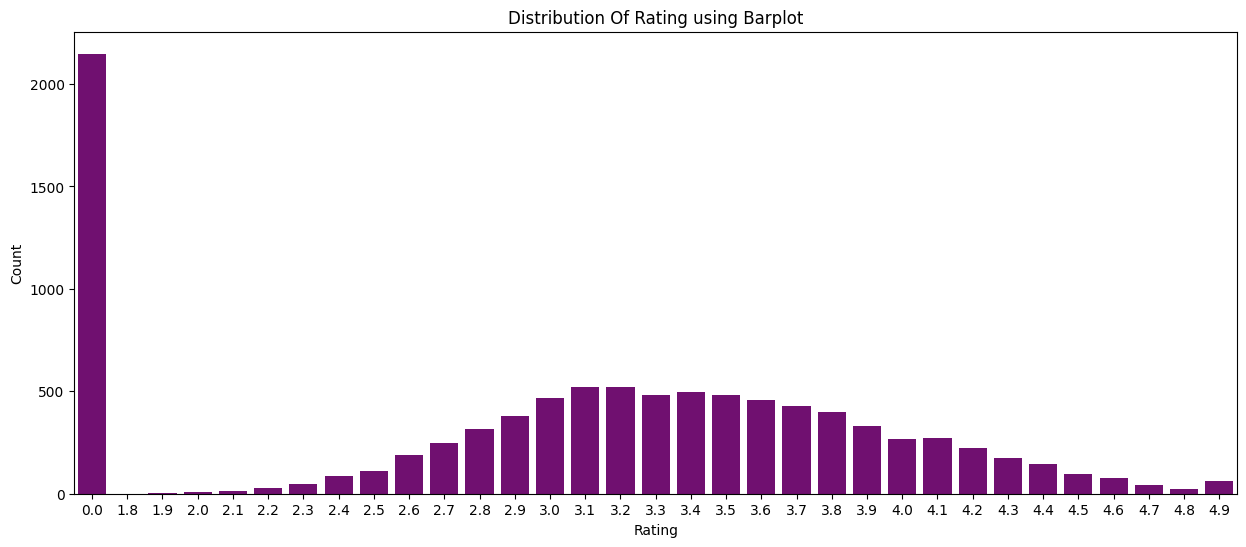

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(x='Aggregate rating', data = data, color ='purple')
plt.title("Distribution Of Rating using Barplot")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [35]:
#Compare the average ratings of different cuisines or cities using appropriate visualizations.
avg_rating_cuisines = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index().head(15).sort_values(by = 'Aggregate rating', ascending =False)
avg_rating_cuisines

,Cuisines,Aggregate rating
13,"American, BBQ, Sandwich",4.900000
4,African,4.700000
7,"American, Asian, Burger",4.600000
8,"American, Asian, European, Seafood",4.600000
9,"American, Asian, Italian, Seafood",4.500000
5,"African, Portuguese",4.200000
12,"American, BBQ, Burger",3.850000
11,"American, BBQ",3.800000
6,American,3.667742
10,"American, Asian, North Indian, Mexican, South ...",3.300000


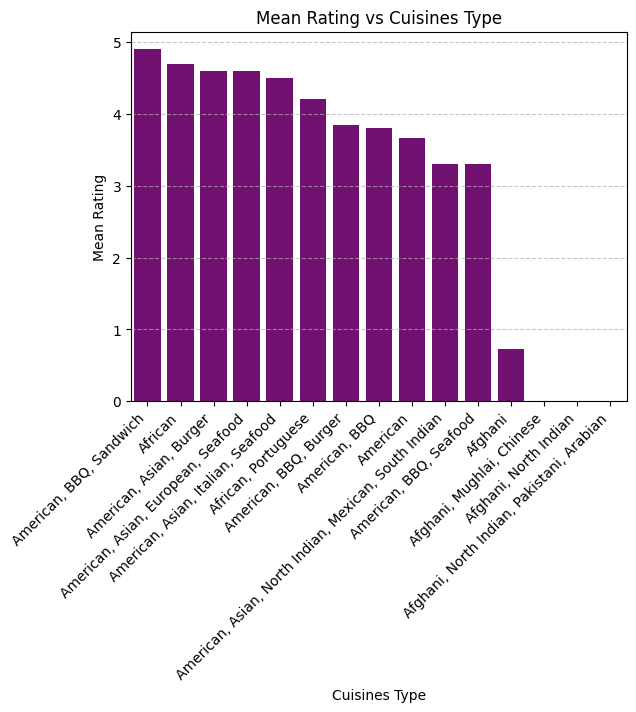

In [36]:
sns.barplot(data = avg_rating_cuisines, x = 'Cuisines', y='Aggregate rating', color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Mean Rating vs Cuisines Type")
plt.xlabel("Cuisines Type")
plt.ylabel("Mean Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
avg_rating_cities = data.groupby('City')['Aggregate rating'].mean().reset_index().head(15).sort_values(by = 'Aggregate rating', ascending = False)
avg_rating_cities

,City,Aggregate rating
14,Bangalore,4.375000
6,Ankara,4.305000
0,Abu Dhabi,4.300000
9,Auckland,4.275000
8,Athens,4.200000
13,Bandung,4.200000
2,Ahmedabad,4.161905
10,Augusta,4.130000
1,Agra,3.965000
5,Amritsar,3.685714


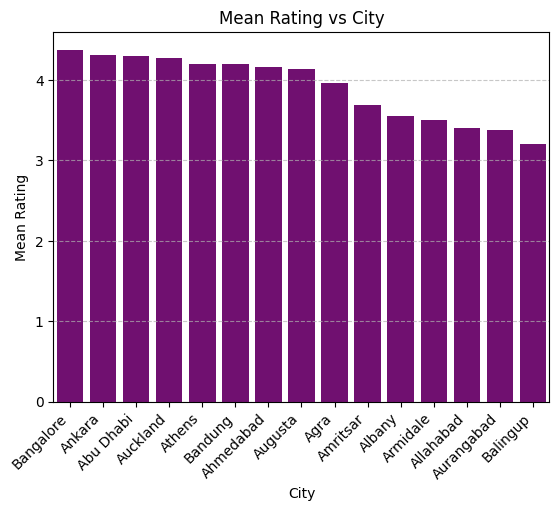

In [38]:
sns.barplot(data = avg_rating_cities, x = 'City', y='Aggregate rating', color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Mean Rating vs City")
plt.xlabel("City")
plt.ylabel("Mean Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

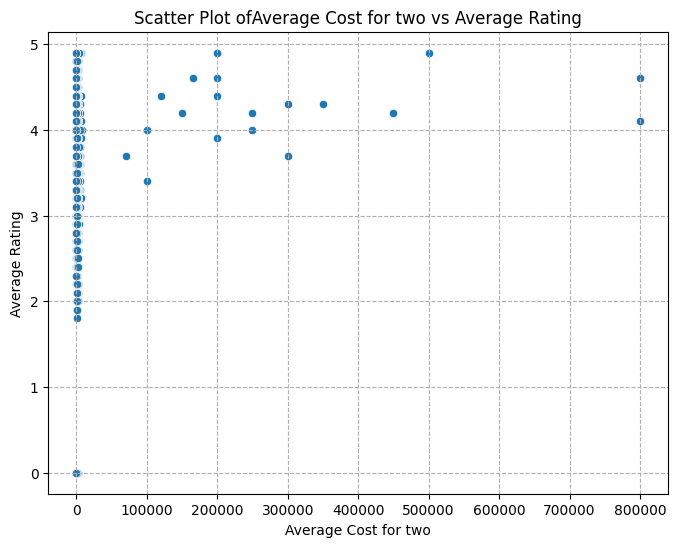

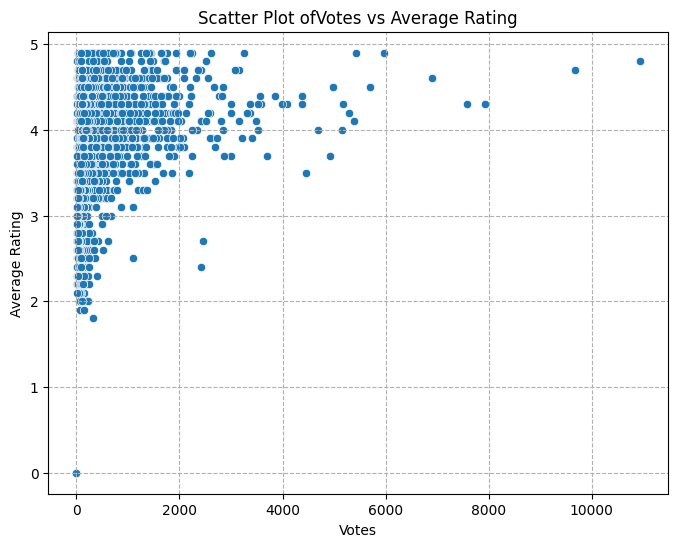

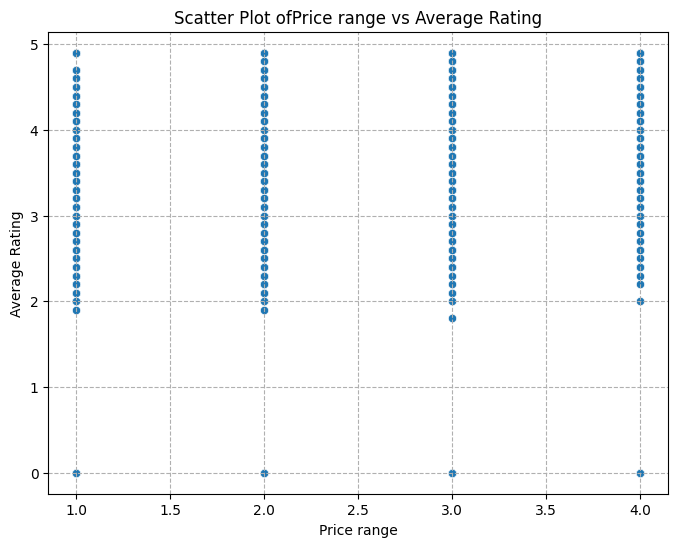

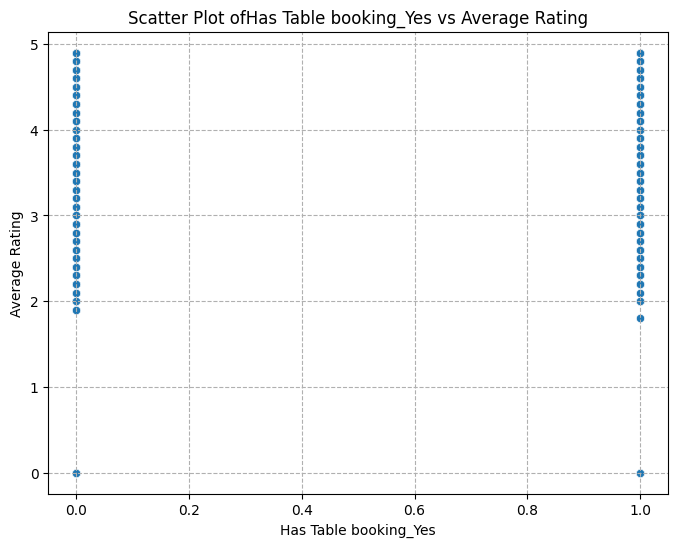

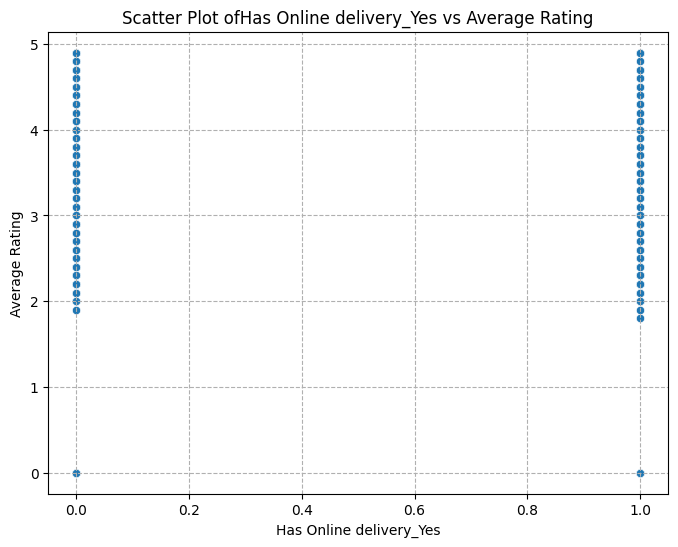

In [40]:
features =['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'
for f in features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data[f], y=data[target])
    plt.xlabel(f)
    plt.ylabel("Average Rating")
    plt.title(f"Scatter Plot of{f} vs Average Rating")
    plt.grid(axis='both', linestyle='--', alpha=1)
    plt.show()